In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from mpl_toolkits.basemap import Basemap as bm
import pymc as pm

Echin1 = pd.read_csv(r'C:\Users\stuar\Documents\GitHub\Bright_spot\Inverts_DB\Echinoderm_final.csv', encoding = "ISO-8859-1", engine='python')
#Echin1 = pd.read_csv(r'C:\Users\stuar\Documents\GitHub\Bright_spot\Inverts_DB\Echino_final_2.csv', encoding = "ISO-8859-1", engine='python')



#correction steps 

#will try removing gravity
#make sure everything is standardized 
#maybe log everthing as well
#compare with other bright spot code 
#maybe try angain with newer model

In [2]:
# Return list of unique items and an index of their position in L
def indexall(L):
    poo = []
    for p in L:
        if not p in poo:
            poo.append(p)
    Ix = np.array([poo.index(p) for p in L])
    return poo,Ix

# Return list of unique items and an index of their position in long, relative to short
def subindexall(short,long):
    poo = []
    out = []
    for s,l in zip(short,long):
        if not l in poo:
            poo.append(l)
            out.append(s)
    return indexall(out)

# Function to standardize covariates
def stdize(x):
    return (x-np.mean(x))/(2*np.std(x))

In [3]:
Echin1['Population'] = Echin1.Population.astype(float)
Echin1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2170 entries, 0 to 2169
Data columns (total 17 columns):
clust                2170 non-null int64
lden                 2170 non-null float64
den                  2170 non-null float64
Code                 2170 non-null object
Year                 2170 non-null object
Phylum               2170 non-null object
Lat                  2170 non-null float64
Lon                  2170 non-null float64
depth                2170 non-null int64
HDI                  1955 non-null float64
Voice                2034 non-null float64
Population           2163 non-null float64
Country_number       2170 non-null int64
Population_growth    2170 non-null float64
SCORE                2170 non-null int64
RATING               2170 non-null object
Grav_tot             2170 non-null int64
dtypes: float64(8), int64(5), object(4)
memory usage: 288.3+ KB


In [4]:
#population
Echin1.dropna(axis=0, subset=['Population'],inplace=True)
Pop = Echin1.Population.values
population_log = np.log(Pop)
Echin1['l_pop'] = population_log

#population growth
Echin1.dropna(axis=0, subset=['Population_growth'],inplace=True)
Pop_grow = Echin1.Population_growth.values
pop_grow_log = np.log(Pop_grow)
Echin1['l_pop_grow'] = pop_grow_log

#gravity
Echin1.dropna(axis=0, subset=['Grav_tot'],inplace=True)

#protection
Echin1.dropna(axis=0, subset=['SCORE'],inplace=True)

#HDI
Echin1.dropna(axis=0, subset=['HDI'],inplace=True)
HDI = Echin1.HDI.values
HDI_log = np.log(HDI)
Echin1['l_HDI'] = HDI_log

#Voice
Echin1.dropna(axis=0, subset=['Voice'],inplace=True)
Voice = Echin1.HDI.values
Voice_log = np.log(Voice)
Echin1['l_Voice'] = Voice_log

Echin1['Country_number'] = pd.factorize(Echin1.Code)[0]


#Echin1.Population.apply(lambda x: np.log(x)).hist(bins=25, grid=False);

Echin1

#make sure I have strdized

C:\Users\stuar\anaconda3\envs\Pymc2_test\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
C:\Users\stuar\anaconda3\envs\Pymc2_test\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log
  # Remove the CWD from sys.path while we load stuff.


,clust,lden,den,Code,Year,Phylum,Lat,Lon,depth,HDI,...,Population,Country_number,Population_growth,SCORE,RATING,Grav_tot,l_pop,l_pop_grow,l_HDI,l_Voice
0,1,0.139762,0.8000,IDN,D,Echinodermata,-0.011100,27.181790,1,0.703667,...,264621182.3,0,77.371,0,None,221,19.393810,4.348612,-0.351451,-0.351451
1,2,-0.162519,0.5000,IDN,B,Echinodermata,-0.035833,119.795000,0,0.652000,...,235523409.4,0,404.113,0,None,39,19.277321,6.001695,-0.427711,-0.427711
2,3,0.615186,1.5000,IDN,B,Echinodermata,-0.036667,119.743000,0,0.652000,...,235523409.4,0,407.607,0,None,39,19.277321,6.010303,-0.427711,-0.427711
3,4,0.850781,2.0000,ECU,B,Echinodermata,-0.040000,-91.520000,0,0.708000,...,14535444.2,1,1.622,3,Not_Effective,0,16.492101,0.483660,-0.345311,-0.345311
4,5,1.713798,5.2000,ECU,B,Echinodermata,-0.050000,-91.540000,0,0.708000,...,14535444.2,1,1.578,3,Not_Effective,0,16.492101,0.456158,-0.345311,-0.345311
5,6,0.955511,2.2500,IDN,B,Echinodermata,-0.103611,119.773000,0,0.652000,...,235523409.4,0,407.165,0,None,46,19.277321,6.009219,-0.427711,-0.427711
6,7,1.410987,3.7500,IDN,A,Echinodermata,-0.132306,100.357000,0,0.622200,...,220333965.0,0,611.166,0,None,385,19.210655,6.415369,-0.474494,-0.474494
7,8,0.095310,0.7500,IDN,A,Echinodermata,-0.146556,119.806000,0,0.622200,...,220333965.0,0,403.846,0,None,46,19.210655,6.001034,-0.474494,-0.474494
8,9,0.139762,0.8000,IDN,D,Echinodermata,-0.178700,127.143370,1,0.703667,...,264621182.3,0,279.118,0,None,9,19.393810,5.631635,-0.351451,-0.351451
9,10,1.047319,2.5000,IDN,A,Echinodermata,-0.202111,99.742600,0,0.622200,...,220333965.0,0,431.009,0,None,535,19.210655,6.066129,-0.474494,-0.474494


In [55]:
#Echin1.to_csv(r'C:\Users\stuar\Documents\GitHub\Bright_spot\Inverts_DB\Echinoderm_final_edited.csv')

-153.403


(array([1.42e+03, 2.72e+02, 1.05e+02, 6.70e+01, 1.50e+01, 1.80e+01,
        1.90e+01, 7.00e+00, 4.00e+00, 6.00e+00, 0.00e+00, 1.00e+00,
        1.00e+00, 0.00e+00, 3.00e+00, 3.00e+00, 3.00e+00, 5.00e+00,
        1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 1.00e+00,
        3.00e+00]),
 array([ -153.403  ,   429.56956,  1012.54212,  1595.51468,  2178.48724,
         2761.4598 ,  3344.43236,  3927.40492,  4510.37748,  5093.35004,
         5676.3226 ,  6259.29516,  6842.26772,  7425.24028,  8008.21284,
         8591.1854 ,  9174.15796,  9757.13052, 10340.10308, 10923.07564,
        11506.0482 , 12089.02076, 12671.99332, 13254.96588, 13837.93844,
        14420.911  ]),
 <a list of 25 Patch objects>)

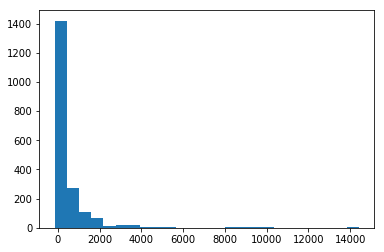

In [29]:
Echin1[Echin1['Population_growth'] < 0]
reg_test = Echin1['Population_growth']
print(reg_test.min())
plt.hist(reg_test, bins = 25)

In [56]:
"""
countries = Echin1.Code.unique() #this is where I should use my country code
n_countries = countries.shape[0] #
country = Echin1.Country_number.values #this is same as county, just numbers, so maybe make a country # ID
log_den = Echin1.lden.values #response so log density
depth = Echin1.depth.values #for me will be depth
log_Pop = Echin1.l_pop.values
log_HDI = Echin1.l_HDI.values #Country for me this will be HDI


country_lookup = dict(zip(countries, np.arange(n_countries))) #creating a dictionary

"""

'\ncountries = Echin1.Code.unique() #this is where I should use my country code\nn_countries = countries.shape[0] #\ncountry = Echin1.Country_number.values #this is same as county, just numbers, so maybe make a country # ID\nlog_den = Echin1.lden.values #response so log density\ndepth = Echin1.depth.values #for me will be depth\nlog_Pop = Echin1.l_pop.values\nlog_HDI = Echin1.l_HDI.values #Country for me this will be HDI\n\n\ncountry_lookup = dict(zip(countries, np.arange(n_countries))) #creating a dictionary\n\n'

In [5]:
# Isolate den
den = Echin1.den.values
# Create log(biomass) response variable
lden = Echin1.lden.values
# Total number of observations
nobs = len(lden)
nobs

1955

In [6]:
#depth
tmp = np.array(Echin1.depth.values) #convert to an array
depth = tmp.astype(int)

#protection
Protection,Ipro = indexall(Echin1.RATING.values)
npro = len(Protection)

# Index observations to social-site scale
SSite,Iss = indexall(Echin1.clust.values)
# Number of social-sites
nsites = len(SSite)
nsites

#set up an indexing array to pluck out a single value for each social site covariate:
# Use Python list indexing to create social-site indexing array
rindx = np.array([[x for x in Iss].index(i) for i in range(nsites)])


In [7]:
#zero is outside MPA 3 is well protected
[np.sum(Echin1.RATING==x) for x in Protection],Protection

#maybe deal with unicoded sting later if need be, couldbe an issue

([1353, 147, 96, 313, 46],
 [u'None', u'Not_Effective', u'Unrated', u'Partially_Effective', u'Effective'])

In [8]:
print Protection

#maybe deal with unicoded sting later if need be, couldbe an issue


[u'None', u'Not_Effective', u'Unrated', u'Partially_Effective', u'Effective']


In [9]:
# Number of environmental observations per social-site
sstotals = np.array([sum(Iss==i) for i in np.unique(Iss)])

In [10]:
max(Ipro)

4

In [11]:
#And set up an indexing array to pluck out a single value for each social site covariate:
    
rindx = np.array([[x for x in Iss].index(i) for i in xrange(nsites)])

In [54]:
# Lat/long coordinates for each social site
SSlat = Echin1.Lat.values[rindx]
abslat = np.abs(SSlat)
SSlon = Echin1.Lon.values[rindx]

# Regional population density
#reg_pop_dens = stdize(np.log(np.array(serfdata.Regional_Pop_density.values[rindx])+1))

# Local population density
#local_pop_dens = stdize(np.log(np.array(serfdata.Local_Pop_density.values[rindx])+1))

# Atoll
#atoll = np.array(serfdata.Atoll.values).astype(int)[rindx]

# Climate stress
# climate_stress = stdize(np.array(serfdata.Climate_stress.values[rindx]))
# sedimentation = np.array(serfdata.Sedimentation.values[rindx])

# Productivity
# productivity =  stdize(np.log(np.array(serfdata.Ocean_prod.values[rindx])))

# Storms
# storms = stdize(np.log(np.array(serfdata.Storms.values[rindx])+1))

# Regional population growth
reg_pop_growth = np.array(Echin1.Population_growth.values[rindx])
reg_pop_growth[reg_pop_growth<-25] = -25
reg_pop_growth = stdize(reg_pop_growth)

# Linear distance to market
#ldistance = np.log(np.array(serfdata.dist.values[rindx]))
#ldistance = stdize(ldistance)

# Gravity to cities
#tmp = np.array(Echin1.grav_tot.values[rindx])
#no lgc for now
#tmp = np.array(Echin1.Grav_tot.values[rindx])
#tmp[tmp==-999] = 0
#lgc = stdize(np.log(tmp+min(tmp[tmp!=0])))

# Gravity NP
#will give same values for now
tmp = np.array(Echin1.Grav_tot.values[rindx])
#tmp[np.isnan(tmp)] = 0
tmp[tmp <= 0] = 0
lgravity_NP = stdize(np.log(tmp+min(tmp[tmp!=0])))

# Gravity total
#tmp = np.array(Echin1.Grav_tot.values[rindx])
#tmp[np.isnan(tmp)] = 0
#tmp[tmp==-999] = 0
#lgravity_total = stdize(np.log(tmp+min(tmp[tmp!=0])))

In [55]:
print(reg_pop_growth.min())
print(reg_pop_growth.max())

-0.21915483258977533
5.358443234906862


(array([307., 260., 220., 333., 299., 341., 121.,  48.,  17.,   9.]),
 array([-0.81522313, -0.57954283, -0.34386252, -0.10818222,  0.12749809,
         0.36317839,  0.5988587 ,  0.834539  ,  1.07021931,  1.30589961,
         1.54157991]),
 <a list of 10 Patch objects>)

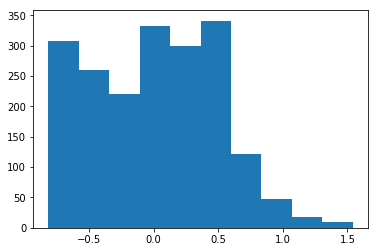

In [56]:
plt.hist(lgravity_NP)

In [57]:
len(Iss)

1955

In [59]:
#The next step is to create some larger-scale indexing,
#so the social-site scale parameters can be matched to the proper larger scale group:

Larger,Il = subindexall(Echin1.Country_number.values,Echin1.clust.values)
nlarger = len(Larger)
print(nlarger)


#Then set up an indexing array to pluck out a single value
#for each larger scale covariate:

# Indexing to map social-site scale onto larger scale
fpx = Echin1.RATING.values
fpx[fpx=='none'] = 'Fished'
LPx = np.array([x+'_'+y for x,y in zip(Echin1.Code.values,fpx)])
LargerPro,Ilp = subindexall(LPx,Echin1.clust.values)
nlarger_pro = len(LargerPro)

ltotals = np.array([sum(Il==i) for i in np.unique(Il)])

#Larger is Coe as it is def a string

70


In [60]:
# Larger-scale indexing for data
tmpL,Ilx = indexall(Echin1.Code.values)
lsite = [x for x in Ilx]
lindx = np.array([lsite.index(i) for i in range(nlarger)])

In [62]:
lgravity_NP_pro = lgravity_NP[Iss]
#lgravity_City_pro = lgc[Iss]

In [65]:
#And finally we can pull all the larger scale covariates out of the data at the proper dimension:


# Population size
lg_pop = stdize(np.array(Echin1.l_pop.values)[lindx])

# Human development index
hdi = stdize(np.array(Echin1.l_HDI.values[lindx]))

# Voice and accountability
voice = stdize(np.array(Echin1.l_Voice.values[lindx]))



(array([ 1.,  1.,  0.,  4.,  7.,  5.,  8., 22., 12., 10.]),
 array([-1.73447861, -1.48415979, -1.23384096, -0.98352214, -0.73320331,
        -0.48288449, -0.23256566,  0.01775316,  0.26807198,  0.51839081,
         0.76870963]),
 <a list of 10 Patch objects>)

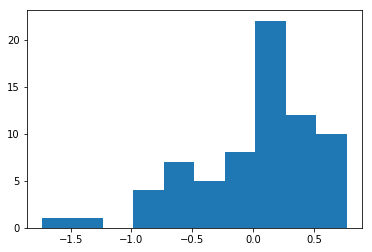

In [69]:
plt.hist(voice)

In [70]:
lden = Echin1.lden.values
#country,Is = indexall(Echin1.Country_number.values)
#ncountry = len(country)

In [71]:
# Observed social site averages
SSobs = np.array([np.mean(lden[Iss==i]) for i in range(nsites)])
# Observed larger averages of social site averages
Lobs = np.array([np.mean(SSobs[Il==i]) for i in range(nlarger)])
# Observed global average
Gobs = np.mean(Lobs)

In [73]:
# Global log-biomass
gamma_0 = pm.Normal('global_den', mu=5.0, tau=0.01, value=5.0)

# Standard deviation of intercepts
sigma1 = pm.Uniform('SD1', lower=0, upper=100000, value=100)
# Precisions of larger-scale intercepts
tau1 = pm.Lambda('tau1', lambda sd=sigma1: sd**-2)

# Larger-scale parameters of interest
gamma_names = ('lg_pop','hdi', 'voice')
ngcov = len(gamma_names)

# Larger covaraites
gamma = pm.Normal('gamma', mu=0.0, tau=0.001, value=np.zeros(ngcov))
# Labeled covaraites
gammaL = [pm.Lambda('%s'%gamma_names[i], lambda g=gamma[i]: g) for i in xrange(ngcov)]

# Linear model for larger-scale intercepts
eta_mu = pm.Lambda('eta_mu', lambda g0=gamma_0, g1=gamma[0], g2=gamma[1], g3=gamma[2]: 
                   g0+g1*lg_pop+g2*hdi+g3*voice)

# Distribution of larger-scale intercepts
eta_0 = pm.Normal('larger_den', mu=eta_mu, tau=tau1, value=Lobs)

In [74]:
# Site-scale parameters of interest
eta_names = ('lgravity_NP','reg_pop_growth')
necov = len(eta_names)

# Larger covaraites
eta = pm.Normal('eta', mu=0.0, tau=0.001, value=np.zeros(necov))
# Labeled covaraites
etaS = [pm.Lambda('%s'%eta_names[i], lambda e=eta[i]: e) for i in xrange(necov)]

# Linear model for social site-scale intercepts
beta_mu = pm.Lambda('beta_mu', lambda e0=eta_0[Il], e1=eta[0], e2=eta[1]: 
                    e0 + e1*lgravity_NP + e2*reg_pop_growth)

# Standard deviation of intercepts
sigma2 = pm.Uniform('SD2', lower=0, upper=1000, value=10.)
# Precisions of larger-scale intercepts
tau2 = pm.Lambda('tau2', lambda sd=sigma2: sd**-2)

# Distribution of social site-scale intercepts
beta_0 = pm.Normal('social_biomass', mu=beta_mu, tau=tau2, value=SSobs)

In [75]:
# Depth
beta_1 = pm.Normal('depth', mu=0.0, tau=0.001, value=0.0)

#Habitat

#protection status
h3 = pm.Normal('h3', mu=0.0, tau=0.001, value=np.zeros(npro-1))
beta_3 = pm.Lambda('beta_3', lambda h3=h3: np.r_[0.0,h3])
Beta_3 = [pm.Lambda('%s'%Protection[i], lambda b3=beta_3[i]: b3) for i in xrange(npro)]

#City gravity
#kappa_4 = pm.Normal('gravity_hyperprior', mu=0.0, tau=0.001, value=0.0)
#beta_4 = pm.Normal('lgravity_city', mu=kappa_4, tau=0.001, value=np.zeros(npro))
#Beta_4 = [pm.Lambda('Gravity_city_%s'%Protection[i], lambda b4=beta_4[i]: b4) for i in xrange(npro)]

# Data-provider

# Linear model
mu = pm.Lambda('mu', lambda b0=beta_0[Iss], b1=beta_1, 
               b2=beta_3[Ipro]: 
                b0+b1*depth+b2)

# Standard deviation of intercepts
sigma3 = pm.Uniform('SD3', lower=0, upper=1000, value=10.)
# Precisions of larger-scale intercepts
tau3 = pm.Lambda('tau3', lambda sd=sigma3: sd**-2)

In [76]:
# Likelihood of observations
#Yi = pm.Normal('Yi', mu=mu, tau=tau3, value=lbiomass, observed=True)
Yi = pm.NoncentralT('Yi', mu, tau3, 3.5, value=lden, observed=True)

In [77]:
# Label larger-scale intercepts
Eta0 = [pm.Lambda('Ex_Eta_%s'%Larger[i], lambda e0=eta_0[i]: e0) for i in xrange(nlarger)]
# Label social site-scale intercepts
Beta0 = [pm.Lambda('Bx_Beta_%s'%SSite[i], lambda b0=beta_0[i]: b0) for i in xrange(nsites)]

We also want to calcuate the deviation of each larger scale and social site-scale location from their expected value (here, just their group mean), which to be cute we'll call their Wins Above Replacement (WAR):

In [79]:
# Calcualte larger average discrepancy from global mean
WAR_larger = [pm.Lambda('WAR_larger_%s'%Larger[i], lambda e0=eta_0[i], g0=gamma_0: e0-g0) 
              for i in xrange(nlarger)]

# Calcualte site average discrepancy
WAR_SSite = [pm.Lambda('WAR_SSite_%s'%SSite[k], lambda b0=beta_0[k], e0=eta_0[Il[k]]: b0-e0) 
             for k in xrange(nsites)]

# Calcualte site average discrepancy from global mean
gWAR_SSite = [pm.Lambda('gWAR_SSite_%s'%SSite[k], lambda b0=beta_0[k], g0=gamma_0: b0-g0) 
             for k in xrange(nsites)]

In [80]:
# Posterior predictive checks
#Zi = pm.Normal('Zi', mu=mu, tau=tau3)

#did this orginally, something to check could try above
Zi = pm.NoncentralT('Yi', mu, tau3, 3.5)

In [81]:
M = pm.MCMC(locals())
M.sample(100000, 90000)

 [-----------------100%-----------------] 100000 of 100000 complete in 815.6 sec

Plotting global_den


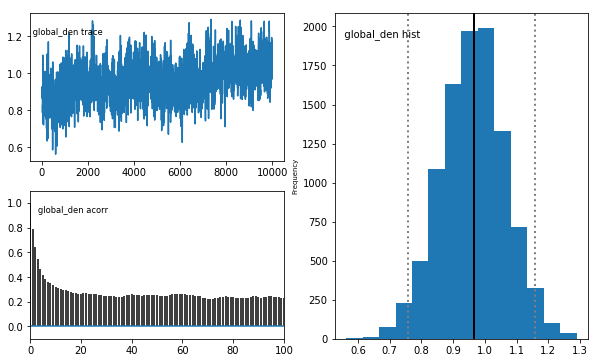

In [82]:
# Plot global average posterior
pm.Matplot.plot(M.gamma_0)

Could not calculate Gelman-Rubin statistics. Requires multiple chains of equal length.


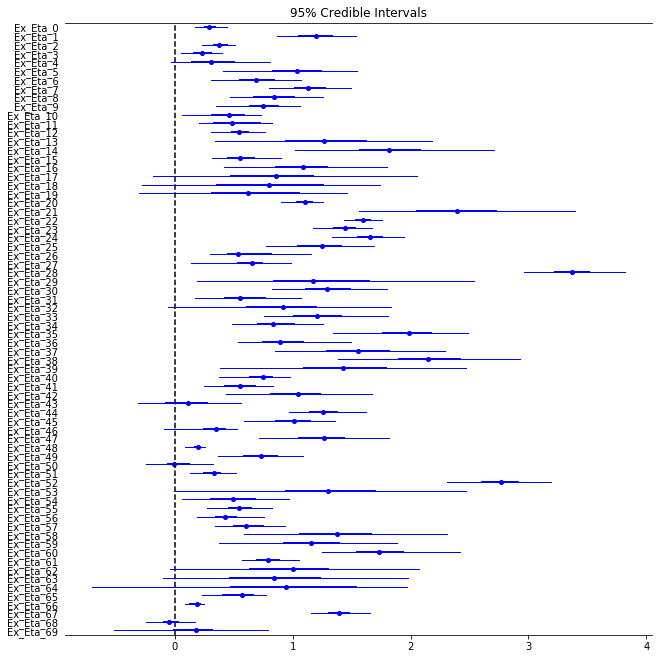

In [83]:
plt.figure(figsize=(10, 10))
pm.Matplot.summary_plot([x for x in M.Eta0])

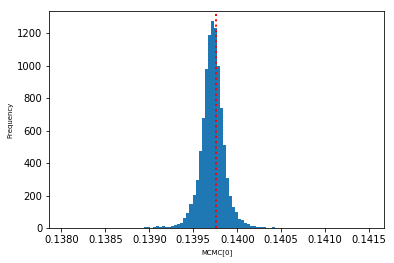

In [84]:
pm.Matplot.gof_plot(M.Zi.trace().T[:1].T, lden[:1])

In [85]:
# Quantile of data vs. predictive check
nfail = np.array([(np.percentile(M.Zi.trace().T[i],97.5)<lden[i])*1
          +(np.percentile(M.Zi.trace().T[i],2.5)>lden[i])*1 for i in xrange(nsites)])
# Percent failure for posterior predictive check
print 'Posterior predictive check: '+str(round(float(nfail.sum())/len(nfail)*100))+'% of observations beyond 95% HPD'

Posterior predictive check: 5.0% of observations beyond 95% HPD


In addition to the posterior predictive checks we can infer goodness of fit from Bayesian p-values, whereby the observed and predicted deviance are compared:

C:\Users\stuar\anaconda3\envs\Pymc2_test\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':
C:\Users\stuar\anaconda3\envs\Pymc2_test\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in sqrt
  if sys.path[0] == '':


GoF=0.465


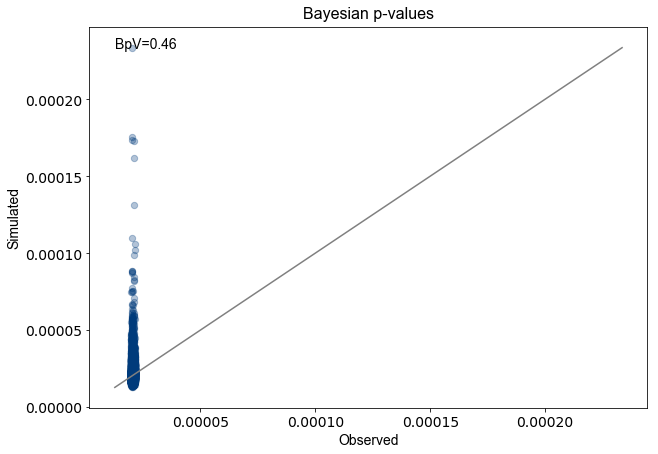

In [86]:
# Bayesian p-values
dobs = []
dsim = []
Yobs = lden
xex = len(Yobs)
mutrace = M.mu.trace()
zitrace = M.Zi.trace()
for i in range(len(mutrace)):
    tmp = (np.sqrt(Yobs)-np.sqrt(mutrace[i]))**2
    tmp[np.isnan(tmp)] = 0
    dobs.append(sum(tmp))
    tmpxx = (np.sqrt(zitrace[i])-np.sqrt(mutrace[i]))**2
    tmpxx[np.isnan(tmpxx)] = 0.
    dsim.append(sum(tmpxx))

naflag = np.isnan(np.array(dsim))==False

if sum(naflag)<xex:
    dobs = np.array(dobs)[naflag]
    dsim = np.array(dsim)[naflag]

if len(dsim)==0 or np.isnan(sum(dsim)):
    print " GoF Fail"

else:
    # Set the font dictionaries (for plot title and axis titles)
    title_font = {'fontname':'Arial', 'size':'16', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space
    axis_font = {'fontname':'Arial', 'size':'14'}
    plt.figure(figsize=(10, 7))
    plt.rcParams.update({'font.size': 12})
    GoF = sum([d>s for d,s in zip(dobs,dsim)])/float(len(dsim))
    xout = np.linspace(min(min(dobs),min(dsim)),max(max(dobs),max(dsim)),100)
    plt.xlabel('Observed',**axis_font)
    plt.ylabel('Simulated',**axis_font)
    plt.tick_params(axis='x', labelsize=14)
    plt.tick_params(axis='y', labelsize=14)
    plt.plot(xout,xout,color='grey')
    plt.scatter(dobs,dsim, c='#003b7b', alpha=0.3, cmap='PuRd', s=40, label='time 0')
    plt.text(min(min(dobs),min(dsim)),max(dsim),'BpV='+str(np.round(GoF,2)),**axis_font)
    plt.title('Bayesian p-values', **title_font)
    plt.savefig("GoF.pdf")
    print "GoF="+str(GoF)

In [87]:
# Order larger WAR estimates
tmp = pd.DataFrame(np.array([[np.median(M.WAR_larger[i].trace()),M.WAR_larger[i].__name__] for i in xrange(nlarger)]),columns=('median','SSite'))
tmp['median'] = tmp['median'].apply(lambda x: str(x))
#tmp = tmp.sort(columns='median')
tmp

#looks like somethin wasn't standardized correctly

,median,SSite
0,-0.6640943613431902,WAR_larger_0
1,0.23884935101382382,WAR_larger_1
2,-0.5819768721560697,WAR_larger_2
3,-0.7311594695697698,WAR_larger_3
4,-0.6696467219553757,WAR_larger_4
5,0.0599530543344966,WAR_larger_5
6,-0.24939542957915506,WAR_larger_6
7,0.17689997166356308,WAR_larger_7
8,-0.12352908059836554,WAR_larger_8
9,-0.21120596401588076,WAR_larger_9


In [98]:
# Get top and bottom 10 social site WAR
ncut = 10
tmp = pd.DataFrame(np.array([[np.median(M.WAR_SSite[i].trace()),M.WAR_SSite[i].__name__] for i in xrange(nsites)]),columns=('median','SSite'))
tmp['median'] = tmp['median'].apply(lambda x: float(x))
#tmp = tmp.sort(columns='median')
#out = tmp.iloc[:ncut,].append(tmp.iloc[-ncut:,], ignore_index=True)
print(tmp['median'].std())

tmp[tmp['median'] > (tmp['median'].std() * 3.0)]
#this looks okay... shows cluster medians

1.0178363955044691


,median,SSite
36,3.522752,WAR_SSite_37
84,3.053785,WAR_SSite_85
188,4.770263,WAR_SSite_192
294,3.393429,WAR_SSite_332
500,3.062867,WAR_SSite_569
597,3.097485,WAR_SSite_715
722,3.403573,WAR_SSite_840
971,4.011373,WAR_SSite_1097
1037,3.202646,WAR_SSite_1163
1100,3.485215,WAR_SSite_1241


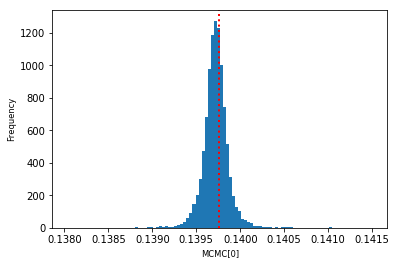

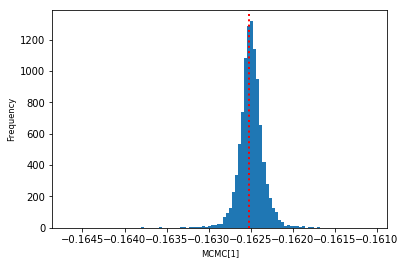

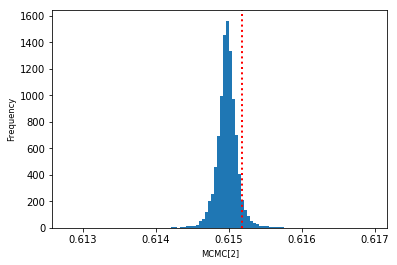

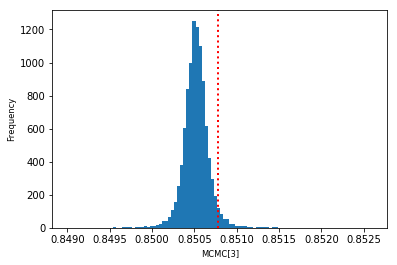

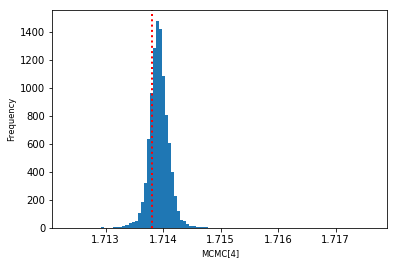

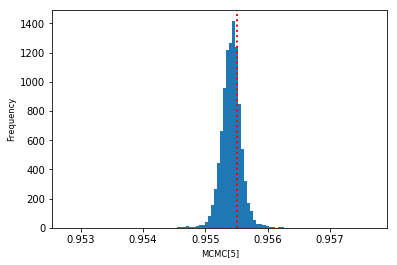

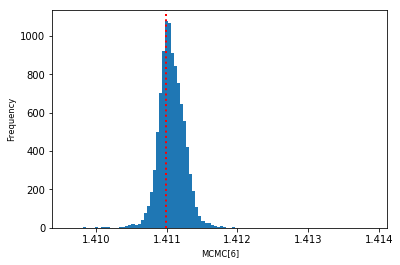

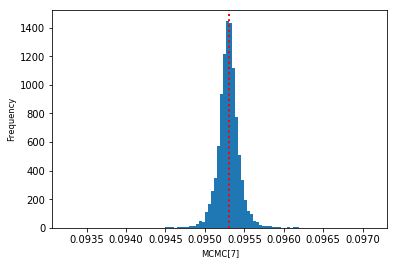

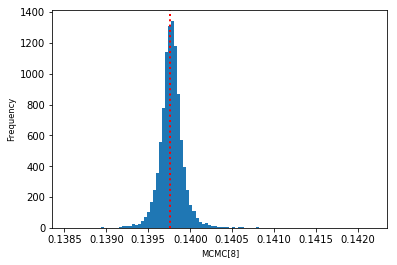

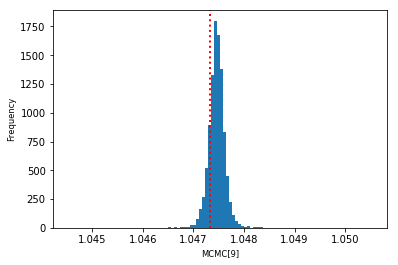

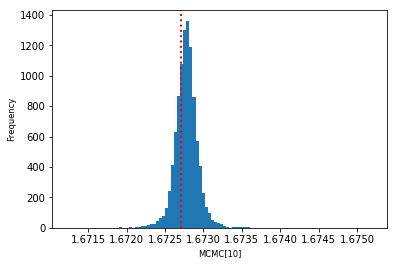

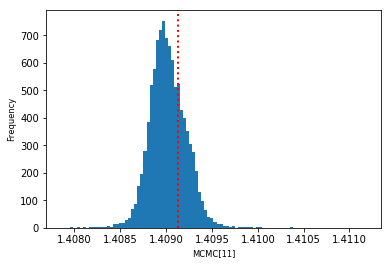

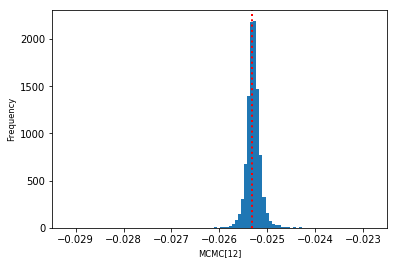

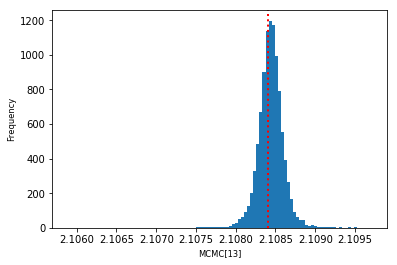

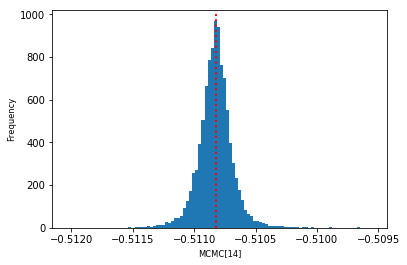

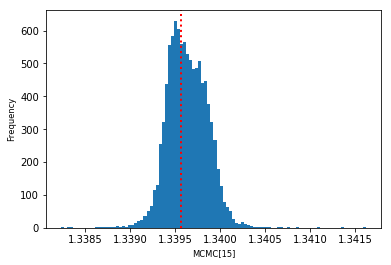

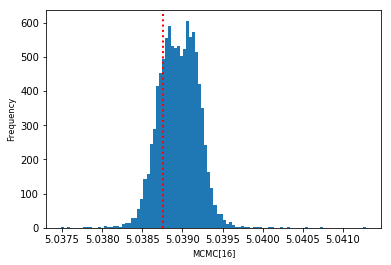

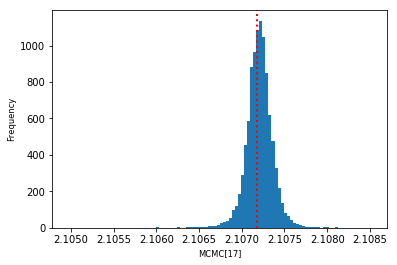

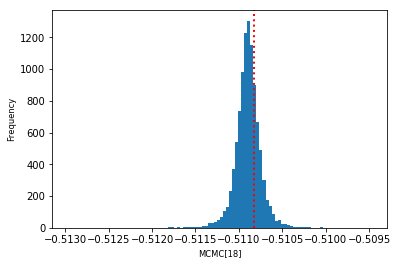

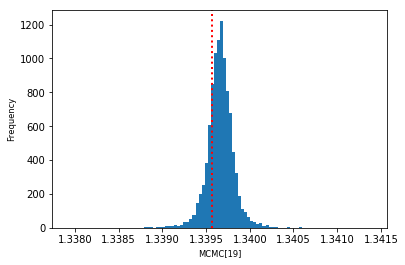

In [89]:
#As a check let's have a look at the observed vs predicted of these sites

# WAR social site result names
war_names = [M.WAR_SSite[i].__name__ for i in xrange(nsites)]
# Index for Zi traces
nindx = np.array([war_names.index(o) for o in out.SSite.values])
# Plot posterior predictive checks
pm.Matplot.gof_plot(M.Zi.trace().T[nindx].T, lden[nindx])